In [1]:
import sys

import matplotlib.pyplot as plt

import cv2
from drosoph3D.GUI.os_util import *
from mpl_toolkits.mplot3d import Axes3D
# from mpl_toolkits.mplot3d import Axes3D
from drosoph3D.GUI.CameraNetwork import CameraNetwork
import drosoph3D.GUI.skeleton as skeleton
from drosoph3D.GUI.os_util import *
import pickle
import glob
%load_ext autoreload
%autoreload 2
plt.style.use('dark_background')

# read the data

7


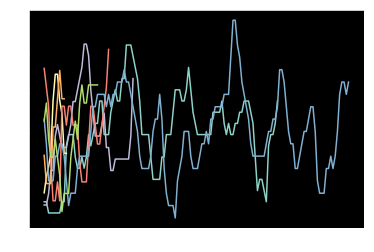

In [10]:
import numpy as np
import matplotlib.pyplot as plt
cam_id = 1
area = 9
ts_list = list()
exp_name_list = list()
frame_idx_list = list()
d = np.load('/home/user/Desktop/joao_pose/results/15h38m_27_03_2019/tsne_results.pickle')

for path, v in d['area51'].items():
    for i in range(10):       
        try:
            frames = np.sort(v[f"sequence_{i}"]["frames"])
            d_ = np.load(path)["points2d"][cam_id][frames]
            frame_idx_list.append(frames)
            t = d_[:,3,1]
            t = (t - np.mean(t))/np.std(t)
            ts_list.append(t)
            exp_name_list.append(path)
        except BaseException as e:
            continue
print(len(ts_list))
plt.figure()
for ts in ts_list:
    plt.plot(ts)

/data/paper/180919_aDN_CsCh/Fly1/005_SG1/behData/images/pose_result__data_paper_180919_aDN_CsCh_Fly1_005_SG1_behData_images.pkl
/data/paper/180919_aDN_CsCh/Fly1/004_SG1/behData/images/pose_result__data_paper_180919_aDN_CsCh_Fly1_004_SG1_behData_images.pkl


(<Figure size 432x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff4311d6898>,
       dtype=object))

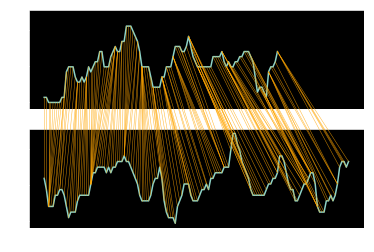

In [15]:
%matplotlib inline
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis
import numpy as np
ts1_idx, ts2_idx = 0,4
print(exp_name_list[ts1_idx])
print(exp_name_list[ts2_idx])
s1 = np.array(ts_list[ts1_idx])
s2 = np.array(ts_list[ts2_idx])
path = dtw.warping_path(s1, s2)
dtwvis.plot_warping(s1, s2, path)
#print(path)